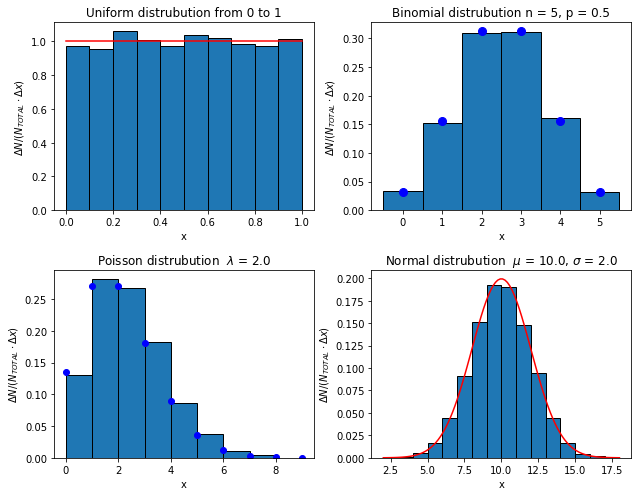

In [1]:
%matplotlib inline
import numpy as npy
import matplotlib.pyplot as plt
import scipy.io as sio    
ndata=10000

#uniform distribution from 0->1
a=0 # a and b are the parameters for unifrand
b=1.0 # use help(npy.random.uniform) for details of the function

#binomial dist
n = 5
probabililty = 0.5

#poisson dist
lmda = 2. # Lambda

#norm
mu = 10.
sig = 2.

from scipy.stats import uniform, binom, poisson, norm

u_data = uniform.rvs(a,b,size=ndata) # Uniform Data
binom_data = binom.rvs(n,probabililty,size=ndata) # Binomial Dist Data
poisson_data = poisson.rvs(lmda,size=ndata) # Poisson Dist Data
norm_data = norm.rvs(mu,sig,size=ndata) # Poisson Dist Data

# Figure
f = plt.figure(figsize=(9,7)) # make a bigger 9cm x 7cm figure


"""
UNIFORM
"""
# Histogram
p = plt.subplot(2,2,1) # split into 2,2 plots (1st and 2nd digit) and return 1st (3rd digit)
u_hist = p.hist(u_data, density=True, edgecolor='black', linewidth=1)

# PDF
xpos = npy.linspace(a,b,10)
p.plot(xpos,uniform.pdf(xpos,a,b),"r-")

# Plot
p.set_title("Uniform distrubution from 0 to 1")
p.set_xlabel('x')
p.set_ylabel(r'$ \Delta N /  (N_{TOTAL} \cdot \Delta x)$')


"""
BINOMIAL
"""
# Histogram
p = plt.subplot(2,2,2)
binom_hist = p.hist(binom_data, density=True, align='left', bins=n+1, range=(0,n+1), edgecolor='black', linewidth=1)

# PMF
xpos = npy.arange(binom.ppf(0.01, n+1, probabililty), binom.ppf(0.99, n+1, probabililty))
p.plot(xpos,binom.pmf(xpos,n,probabililty),"bo", ms=8, label="pmf")

# Plot
p.set_title("Binomial distrubution n = "+str(n)+", p = "+str(probabililty))
p.set_xlabel('x')
p.set_ylabel(r'$ \Delta N /  (N_{TOTAL} \cdot \Delta x)$')



"""
POISSON
"""
#Histogram
p = plt.subplot(2,2,3)
spr = 4
poisson_hist = p.hist(poisson_data, density=True, bins=int(lmda*spr), range=(0,int(spr*lmda)), edgecolor='black', linewidth=1)

# PMF
xpos = npy.arange(poisson.ppf(0.01, lmda), poisson.ppf(0.99999, lmda))
p.plot(xpos,poisson.pmf(xpos,lmda),"bo", lw=5, label="pmf")

p.set_title("Poisson distrubution  $\lambda$ = "+str(lmda))
p.set_xlabel('x')
p.set_ylabel(r'$ \Delta N /  (N_{TOTAL} \cdot \Delta x)$')

"""
NORMAL
"""
# Histogram
p = plt.subplot(2,2,4)
spr = int(4*sig) # number of Std to display on the graph.
norm_hist = p.hist(norm_data, density=True, bins=2*spr, range=(mu-spr, mu+spr), edgecolor='black', linewidth=1)

# PDF
xpos = npy.linspace(mu-spr,mu+spr,100)
p.plot(xpos,norm.pdf(xpos,mu,sig),"r-")

p.set_title("Normal distrubution  $\mu$ = "+str(mu)+", $\sigma$ = "+str(sig))
p.set_xlabel('x')
p.set_ylabel(r'$ \Delta N /  (N_{TOTAL} \cdot \Delta x)$')


plt.tight_layout()
plt.show()

